In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt  # noqa

torch.manual_seed(123)

In [2]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [3]:
from torchvision import datasets, transforms

data_path = "../data/p1ch7/"
cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465),
            (0.2470, 0.2435, 0.2616),
        )
    ])
)

cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465),
            (0.2470, 0.2435, 0.2616),
        )
    ])
)

In [4]:
label_map = {0: 0, 2: 1}
cifar2 = [
    (img, label_map[label]) for img, label in cifar10
    if label in [0, 2]
]
cifar2_val = [
    (img, label_map[label]) for img, label in cifar10_val
    if label in [0, 2]
]

In [5]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
)

In [6]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [7]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [8]:
softmax(x).sum()

tensor(1.)

In [9]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([
    [1.0, 2.0, 3.0],
    [1.0, 2.0, 3.0],
])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [10]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


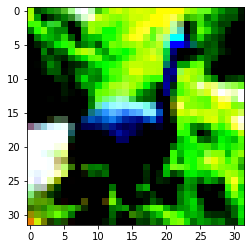

In [11]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [12]:
img_batch = img.view(-1).unsqueeze(0)

In [14]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward0>)

In [15]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [18]:
out = torch.tensor(
    [
        [0.6, 0.4],
        [0.9, 0.1],
        [0.3, 0.7],
        [0.2, 0.8],
    ]
)
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4, 2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [19]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()


mse(out)

tensor(0.1500)

In [20]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [21]:
out

tensor([[0.6000, 0.4000],
        [0.9000, 0.1000],
        [0.3000, 0.7000],
        [0.2000, 0.8000]])

In [24]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod


likelihood(out)

tensor([0.3024])

In [25]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [26]:
loss = nn.NLLLoss()

In [27]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.5079, grad_fn=<NllLossBackward0>)

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1),
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch}, Loss: {float(loss)}")

Epoch: 0, Loss: 5.646818161010742
Epoch: 1, Loss: 6.11192512512207
Epoch: 2, Loss: 13.607589721679688
Epoch: 3, Loss: 7.014048099517822
Epoch: 4, Loss: 4.741953372955322
